### (1) Jacobi 반복법

- 1. 연립방정식 Ax = b를 스칼라 표현
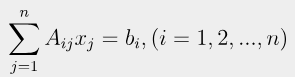

- 2. 합산 기호에서 xi를 포함하는 항을 뽑기
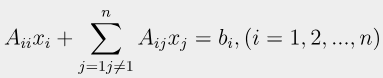

- 3. xi에 대해 풀기
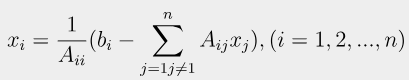

- 4. 마지막 식을 이용
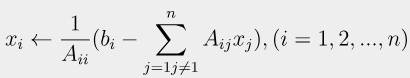

**계산 주기**
- 연속된 반복 주기의 x사이에서 계산값의 변화가 충분히 작아질 때까지 반복
- 초기 벡터 x를 선택하고 계산을 시작
    - 해에 대한 적당한 초기값을 잡을 수 없으면 x는 무작위
- 마지막 식을 이용해 x의 각 요소에 대해 계산
    - 이 떄 xj는 가장 최근에 이용할 수 있는 값 이용

In [4]:
# Jacobi법에 의한 선형연립방정식 풀이
import numpy as np
from Jacobi import *

if __name__ == '__main__':
    A = np.array([[4.0, -1.0, 1.0],
                  [-1.0, 4.0, -2.0],
                  [1.0, -2.0, 4.0]])
    b = np.array([12.0, -1.0, 5.0])
    
    AOrg = A.copy()
    bOrg = b.copy()
    
    # Jacobi법에 의한 계산
    x, it = Jacobi(A, b, tol = 1.0e-7)
    
    # 결과 출력
    print("반복횟수: ", it)
    print('\n계산 결과: x = ', x)
    print('\n결과 확인: [A]{x} - b = \n', np.dot(AOrg, x) - bOrg)

반복횟수:  49

계산 결과: x =  [2.99999997 1.00000004 0.99999996]

결과 확인: [A]{x} - b = 
 [-1.88599049e-07  2.57631100e-07 -2.57631092e-07]


### (2) Gauss-Seidel법

- Jacobi법은 반복횟수가 많아 실용성이 떨어짐
- Jacobi법의 마지막 식에서 우변의 xj는 이전 반복에서 계산된 값을 그대로 이용

- 시간에 대한 항을 k라고 할 때 Jacobi법을 다시 쓰면
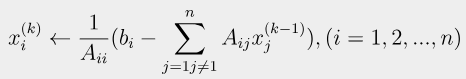

- 현재 i행을 계산한다고 하면, i - 1행까지는 이미 k시각의 값 x^(k)가 새로 계산되어 있음
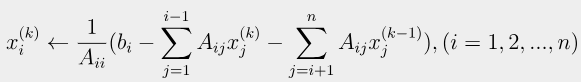

In [3]:
# Gauss-Seidel법에 의한 선형연립방정식 풀이
import numpy as np
from GaussSeidel import *

if __name__ == '__main__':
    A = np.array([[4.0, -1.0, 1.0],
                  [-1.0, 4.0, -2.0],
                  [1.0, -2.0, 4.0]])
    b = np.array([12.0, -1.0, 5.0])
    
    AOrg = A.copy()
    bOrg = b.copy()
    
    # Jacobi법에 의한 계산
    x, it = GaussSeidel(A, b, tol = 1.0e-7)
    
    # 결과 출력
    print("반복횟수: ", it)
    print('\n계산 결과: x = ', x)
    print('\n결과 확인: [A]{x} - b = \n', np.dot(AOrg, x) - bOrg)

반복횟수:  12

계산 결과: x =  [3. 1. 1.]

결과 확인: [A]{x} - b = 
 [-1.48077746e-08 -2.01986339e-09 -8.88178420e-16]


### (3) 연속이완법

**이완 (relaxation) : xi의 새로운 값을 이전 값과 예측된 값의 가중평균으로 놓기**
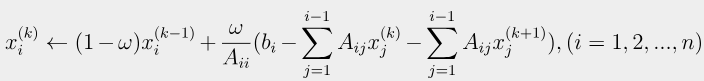

**이완계수 (relaxation factor) : 가중값 ω**

- ω= 1 : 이완을 하지 않음. Gauss-Seidel법이 됨
- ω < 1 : 과소 이완 (under-relaxation)
- 1 < ω < 2 : 과대 이완 (over-relaxation)
- ω > 1 : 연속이완법 (SOR, successive over-relaxation method)

In [1]:
# 이완이 있는 Gauss-Seidel법에 의한 선형연립방정식 풀이
import numpy as np
from GaussSeidelRelax import *

if __name__ == '__main__':
    A = np.array([[4.0, -1.0, 1.0],
                  [-1.0, 4.0, -2.0],
                  [1.0, -2.0, 4.0]])
    b = np.array([12.0, -1.0, 5.0])
    
    AOrg = A.copy()
    bOrg = b.copy()
    
    # Jacobi법에 의한 계산
    x, it = GaussSeidelRelax(A, b, omega = 1.03, tol = 1.0e-7)
    
    # 결과 출력
    print("반복횟수: ", it)
    print('\n계산 결과: x = ', x)
    print('\n결과 확인: [A]{x} - b = \n', np.dot(AOrg, x) - bOrg)

반복횟수:  9

계산 결과: x =  [3.00000031 1.00000035 1.00000008]

결과 확인: [A]{x} - b = 
 [ 9.69053476e-07  9.15846937e-07 -6.42255618e-08]


**Gauss-Seidel법의 수렴성**

In [2]:
# Gauss-Seidel법의 수렴성

import numpy as np
from GaussSeidelRelax import *

def makeEqs(n):
    A = np.zeros((n, n), dtype=float)
    A[0][0] = 2.0
    A[0][1] = -1.0
    A[0][n-1] = 1.0
    for i in range(1, n-1):
        A[i][i-1] = -1.0
        A[i][i] = 2.0
        A[i][i+1] = -1.0
    A[n-1][0] = 1.0
    A[n-1][n-2] = -1.0
    A[n-1][n-1] = 2.0
    
    b = np.zeros(n, dtype=float)
    b[n-1] = 1.0
    return A, b

if __name__ == '__main__':
    # 방정식 구성
    n = int(input("방정식의 수 ==> "))
    
    A, b = makeEqs(n)
    # print("A = \n", A)
    # print("b = \n", b)
    
    x = np.zeros(n)
    xe = np.zeros(n)
    
    # 정확해
    for i in range(n):
        xe[i] = -n / 4.0 + i / 2.0
        
    # 선형연립방정식 풀이
    A0 = A.copy()
    b0 = b.copy()
    
    x, it = GaussSeidelRelax(A, b, omega = 1.2, tol = 1.0e-6)
    
    c = np.dot(A0, x) - b0
    
    print("\n반복횟수 =", it)
    print("         해        정확해")
    for i in range(n):
        print("{0:12.8f} {0:12.8f}".format(x[i], xe[i]))
    print("검증 = \n", c)

방정식의 수 ==> 20

반복횟수 = 338
         해        정확해
 -4.50002384  -4.50002384
 -4.00002530  -4.00002530
 -3.50002614  -3.50002614
 -3.00002633  -3.00002633
 -2.50002586  -2.50002586
 -2.00002476  -2.00002476
 -1.50002305  -1.50002305
 -1.00002078  -1.00002078
 -0.50001800  -0.50001800
 -0.00001479  -0.00001479
  0.49998877   0.49998877
  0.99999260   0.99999260
  1.49999660   1.49999660
  2.00000067   2.00000067
  2.50000471   2.50000471
  3.00000862   3.00000862
  3.50001230   3.50001230
  4.00001566   4.00001566
  4.50001863   4.50001863
  5.00002112   5.00002112
검증 = 
 [-1.24472858e-06 -6.30147579e-07 -6.48570052e-07 -6.50907375e-07
 -6.37158711e-07 -6.07720557e-07 -5.63375547e-07 -5.05271751e-07
 -4.34893027e-07 -3.54021182e-07 -2.64690905e-07 -1.69138614e-07
 -6.97465050e-08  3.10168082e-08  1.30657574e-07  2.26718589e-07
  3.16839763e-07  3.98816072e-07  4.70651469e-07 -2.16229687e-07]
